In [106]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
#Sklearn important libraries
from sklearn.metrics import make_scorer,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import sklearn.datasets
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LogisticRegression

In [108]:
#Scipy lib to find the skewness among the attributes
from scipy.stats import skew

In [109]:
#Removing the Warnings
import warnings
warnings.filterwarnings('ignore')

In [110]:
#Importing the data
df=pd.read_csv("abalone.csv")

In [111]:
#Checking the head of the data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [112]:
#getting the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [21]:
#Decribing the data that is numrical attributes here becuase include !=all 
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [114]:
#nf is numerical features using select_dtypes() function putting the parameter np.number for the number
#and the np.object for the object type
#and yes the cf is nothing but the categorical features
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbe4721650>,
      dtype=object)

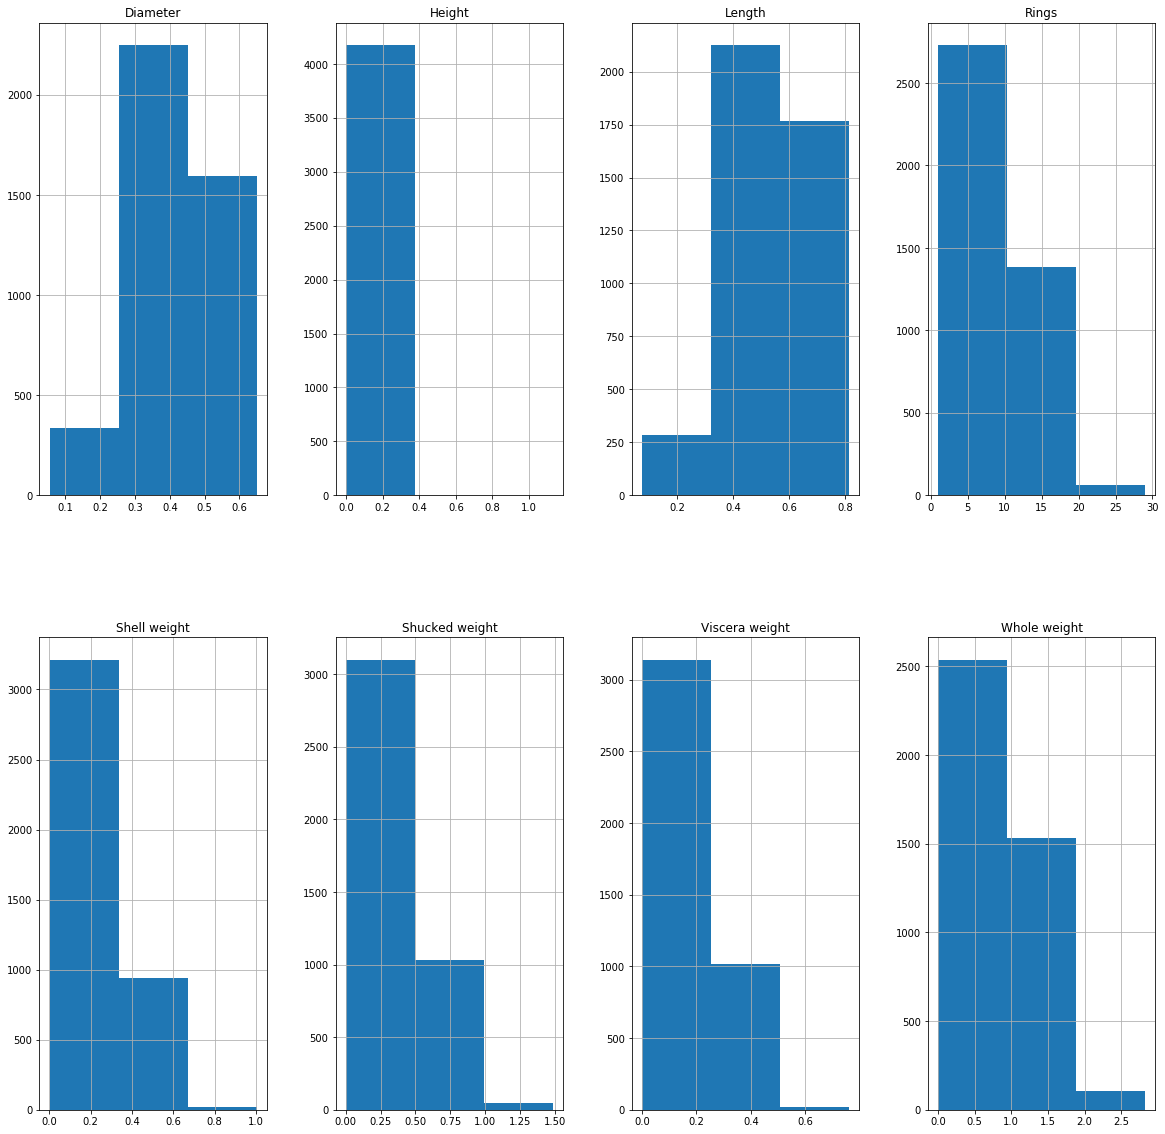

In [113]:
#Building histogram of the dataset attributes to see the distribution of the data
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 3)

In [116]:
#Checking the skewness of the attributes using skew function from the scipy package
#putting all the numerical features into it 
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
print(skew_list)#list of skewness values


#Concatenating the DataFrames
#using the concat method
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

[-0.63964346 -0.60897935  3.12769368  0.53076787  0.71883966  0.59163959
  0.62070382  1.11370177]


In [117]:
#skewness dataframe along side with all the attributes
skew_list_df

,Features,Skewness
0,Length,-0.639643
1,Diameter,-0.608979
2,Height,3.127694
3,Whole weight,0.530768
4,Shucked weight,0.718840
5,Viscera weight,0.591640
6,Shell weight,0.620704
7,Rings,1.113702


In [27]:
#Same as Skewness we are checking the null values in each column and their 
#percentages and then making of the dataframe


#Arrange in the descending order
mv_df = df.isnull().sum().sort_values(ascending = False)


#Calculating the Percentages  
pmv_df = (mv_df/len(df)) * 100

#Making of the DataFrame
missing_df = pd.concat([mv_df,pmv_df], axis = 1, keys = ['Missing Values','% Missing'])

#Printing of the DataFrame
missing_df

,Missing Values,% Missing
Rings,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Whole weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


In [28]:
#How many types of Rings are there
print(len(df.Rings.unique()))

28


In [118]:
#Makinf of the new Age column
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [119]:
#Seeing the Sex attribute before the Encoding 
df['Sex'].tolist()

['M',
 'M',
 'F',
 'M',
 'I',
 'I',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'I',
 'F',
 'M',
 'M',
 'M',
 'I',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'I',
 'I',
 'I',
 'I',
 'M',
 'F',
 'I',
 'F',
 'I',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'I',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'I',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'I',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'I',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'I',
 'F',
 'M',
 'I',
 'I',
 'I',
 'I',
 'M',
 'M',
 'M',
 'F',
 'F',
 'I',
 'I',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'I',
 'I',
 'I',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F'

In [120]:
'''LabelEnconding the Categorical Data'''
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [121]:
#Seeing the Sex attribute after the Encoding 

df['Sex'].tolist()

[2,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [35]:
#Always read and see the code carefully
transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
transformed_sex_feature.shape

(4177, 3)

In [36]:
'''One Hot Encoding for Sex Feature '''
#transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

In [37]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


In [38]:
'''Learning Features and Predicting Features'''
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [40]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=0)

In [41]:
#Everything is done upto here just now build our machine learning model

In [43]:
#No of Classes : 28
#Tough to build the logistic regression classifier
#But just try

In [47]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred=log_reg.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.23930384336475707

In [48]:
#Very Very BAd

In [49]:
#Doing Something Interesting
#And Creating new Target Variable

In [50]:
df['new_rings']=np.where(df['Rings']>10,1,0)

In [51]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2,new_rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0,0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0,0


In [53]:
'''Learning Features and Predicting Features'''
Xtrain = df.drop(['new_rings','Rings','Age','Sex'], axis = 1)
Ytrain = df['new_rings']

In [54]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [55]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [56]:
result_acc

0.7715736040609137

In [57]:
#Now Dealing with the Multi Class Classification Problem 

In [58]:
from sklearn.svm import SVC
'''Learning Features and Predicting Features'''
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [66]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [60]:
#Let us see the accuracy of the support vector machines on building this model

In [80]:
classifier=SVC(kernel='rbf',random_state=0,C=32,gamma=0.5)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
result_acc=accuracy_score(Y_test,Y_pred)
result_acc

0.4126178390137781

In [86]:
'''Making a Copy of the primary DataSet'''
new_df = df.copy()

In [87]:
'''Feature Engineering , class 1 - 1-8, class 2 - 9-8, class 3 - 11 >'''
new_df['newRings_1'] = np.where(df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [88]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [89]:
new_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2,new_rings,newRings_1,newRings_2,newRings_3,newRings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0,1,0,0,3,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0,0,1,0,0,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0,0,0,2,0,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0,0,0,2,0,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0,0,1,0,0,1


In [90]:
'''Learning Features and Predicting Features'''
Xtrain = new_df.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3','new_rings'], axis = 1)
Ytrain = new_df['newRings']

In [91]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [100]:
kernel_svm=SVC(kernel='rbf',random_state=0,C=1,gamma=88)
kernel_svm.fit(X_train,Y_train)
Y_pred=kernel_svm.predict(X_test)
result_acc=accuracy_score(Y_test,Y_pred)
result_acc

0.9854967367657723

In [101]:
#Conclusion is In this dataset you can divide the classes into two three types
#Depending on the number of different types of Shapes (number of rings ,weight etc)
#But it is very difficult to find the 28 classes
#May be unsupervised learning can be a good choice which finds the pattern among them


In [126]:
#Future Work:Neural Network can be good if we somehow able to have large datasets